# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

# Exercise 1

### Single-Layer Neural Network

Single layer neural network\
One neuron with input features\
Weights associated with these features\
A bias\
Sigmoid activation function to make predictions\
Log loss

In [2]:
# Code for printing the decision boundary
def plot_decision_boundary (nn , X, y, title =" Decision Boundary "):
    x_min , x_max = X[:, 0]. min () - 1, X[:, 0]. max () + 1
    x_values = np. linspace (x_min , x_max , 300)

    """
    TODO : Calculate the y_values for the decision boundary line based on the
    model ’s weights , the x_values and the model bias .
    """
    y_values = -(nn.weights[0]/nn.weights[1]) * x_values - (nn.bias/nn.weights[1])
    # y_values = -(nn.weights[0] * x_values + nn.bias) / nn.weights[1]

    plt . scatter (X[:, 0], X[:, 1], c=y, s=20 , edgecolor ="k")
    plt . plot ( x_values , y_values , label ="Decision Boundary")
    plt . xlim (x_min , x_max )
    plt . ylim (X[:, 1]. min () - 1, X[:, 1]. max () + 1)
    plt . title ( title )
    plt . legend ()
    plt . show ()

In [3]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    sigmoid_output = 1 / (1 + np.exp(-z))
    return sigmoid_output

In [4]:
class SingleLayerNN:
    def __init__(self, input_dimensions):
        # Init random weights and bias
        self.weights = np.random.rand(2)
        self.bias = 1

    def predict(self, x):
        '''
        Sum up all the weights
        Add bias
        Use activation function and return output
        '''
        summed_weight = np.dot(self.weights.T, x) + self.bias
        prediction_output = sigmoid(summed_weight)
        return prediction_output

    def train(self, X, y, epochs, learning_rate):
        '''
        Define learning rate and make prediction
        Go through all of the epochs
        Predict the current states
        Calculate the loss for convenience
        Define the update rules and utilise them
        '''
        learning_rate = learning_rate
        print(f"Learning rate: {learning_rate}")

        # Decision boundary before training        
        plot_decision_boundary(self, X, y)

        for epoch in range(epochs+1):
            if epoch == epochs:
                plot_decision_boundary(self, X, y)
                return
            for i in range(len(X)):
                # Prediction
                y_pred = self.predict(x=X[i])
                # loss = -(y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred))
                # print(f"Epoch: {epoch+1}/{epoch+1}, Loss: {loss}, Value: {X[i]}")
                # Update rules
                delta = (y[i] - y_pred)
                derivative = (y_pred * (1 - y_pred))
                dw = (learning_rate * delta) * derivative  * X[i]
                db = (learning_rate * delta) * derivative
                # Update variables
                self.weights = self.weights + dw
                self.bias = self.bias + db

            # Debugging / testing behaviour
            y_pred = self.predict(x=X.T)
            loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            avg_loss = np.mean(loss)
            print(f"Average loss: {avg_loss}")



            # Make Prediction
            #y_pred = self.predict(x=X)
            # print(len(y_pred))

            # Calculating and printing loss
            # loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            # avg_loss = np.mean(loss)
            # print(f"Currently in epoch {epoch+1}/{epochs} with average loss {avg_loss}")

            # Defining update rules
            # delta = (y - y_pred)
            # derivative = y_pred * (1 - y_pred)
            # dw = learning_rate * np.dot(X.T, delta * derivative)
            # db = learning_rate * delta * derivative

            # Update parameters
            # self.weights = self.weights + dw
            # self.bias = self.bias + db
        
        
        # Decision boundary after training
        '''Call to the DecisionBoundaryFunction'''

In [5]:
# Generate synthetic data for two classes
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1

In [6]:
# Define training X, y
X = np.concatenate((features_class_0, features_class_1), axis=0)
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)), axis=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [7]:
learning_rates = [1.0, 0.1, 0.001, 0.0001, 0.00001]

Learning rate: 1.0


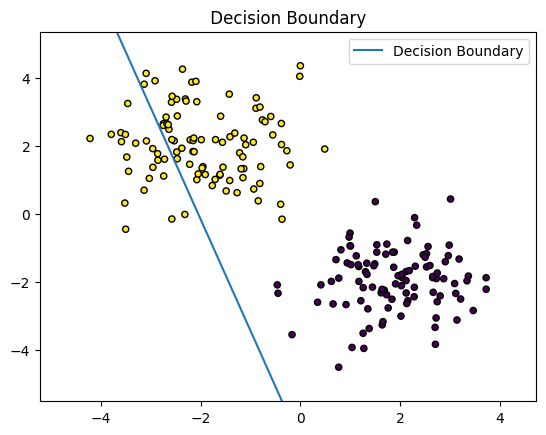

Average loss: 0.023402112114894146
Average loss: 0.01661368533120933
Average loss: 0.013523498771231632
Average loss: 0.011649957865697825
Average loss: 0.010357050816778908
Average loss: 0.009395235095535448
Average loss: 0.008643506275834035
Average loss: 0.008035031379154988
Average loss: 0.007529457879041448
Average loss: 0.007100779185996766


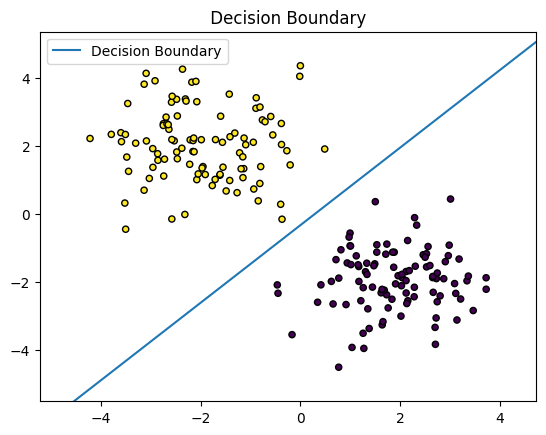

Learning rate: 0.1


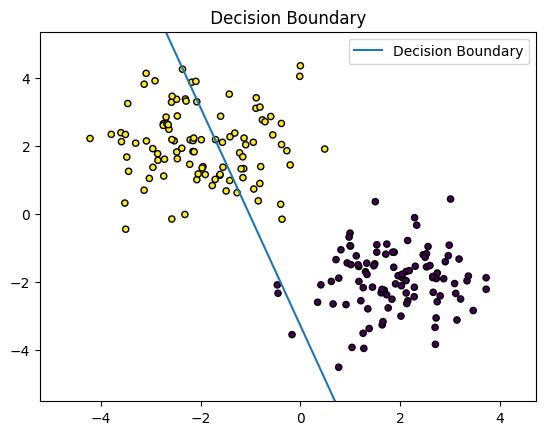

Average loss: 0.0870240398393963
Average loss: 0.05509985935663932
Average loss: 0.04333799490590323
Average loss: 0.03688072772236085
Average loss: 0.0326779184190515
Average loss: 0.029667479647691633
Average loss: 0.027374525785310046
Average loss: 0.0255519389520043
Average loss: 0.024057169030872166
Average loss: 0.02280159306963061


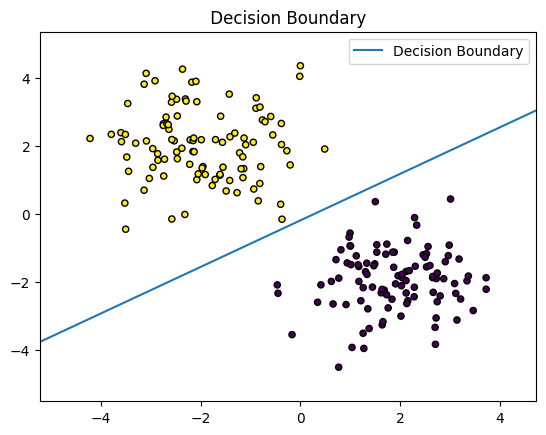

Learning rate: 0.001


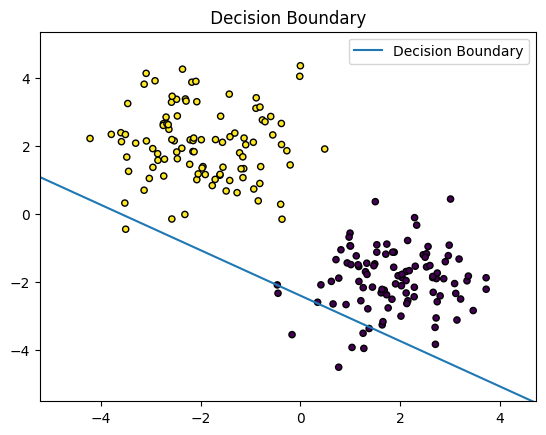

Average loss: 0.6429520768685909
Average loss: 0.5915352484454423
Average loss: 0.5454799432298019
Average loss: 0.504451356132206
Average loss: 0.4680454893243607
Average loss: 0.4358167571582652
Average loss: 0.4073075044067905
Average loss: 0.3820728028326743
Average loss: 0.3596976652029619
Average loss: 0.3398067122308435


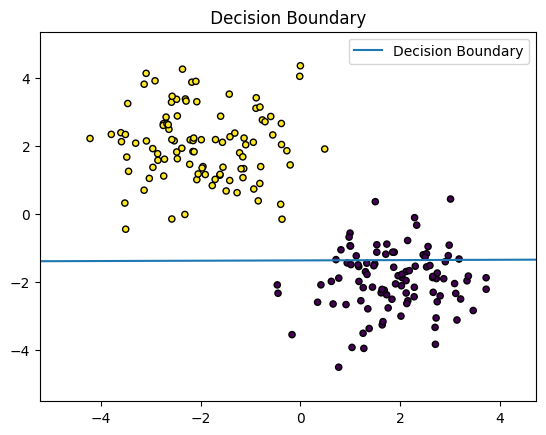

Learning rate: 0.0001


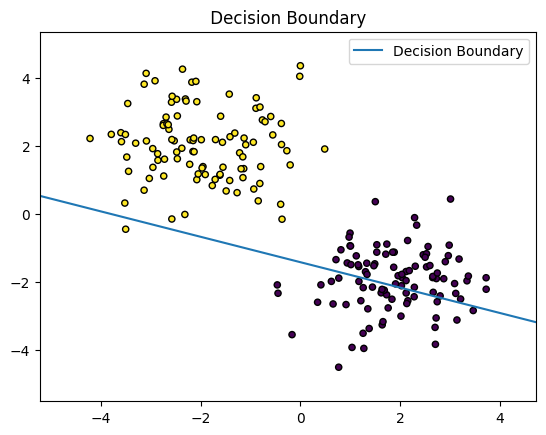

Average loss: 0.4896669356278344
Average loss: 0.4862234461034577
Average loss: 0.48281816175598036
Average loss: 0.4794507178136263
Average loss: 0.47612074843794744
Average loss: 0.472827886895315
Average loss: 0.46957176572640363
Average loss: 0.46635201691340344
Average loss: 0.46316827204472766
Average loss: 0.4600201624769906


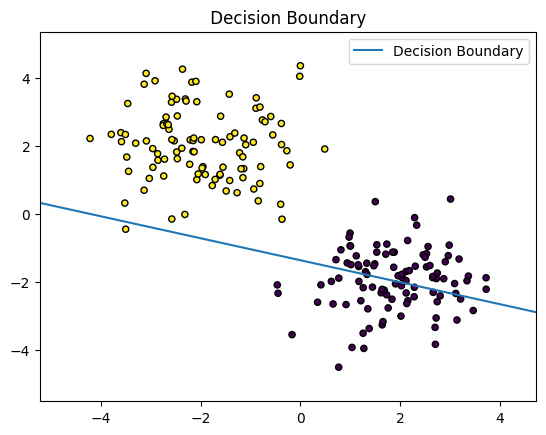

Learning rate: 1e-05


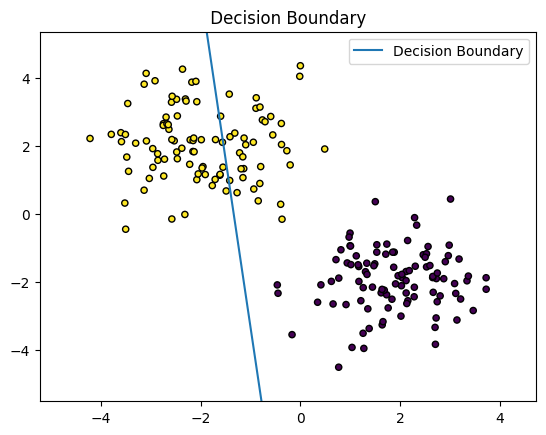

Average loss: 1.6567989952387958
Average loss: 1.6556443272044197
Average loss: 1.65448968724756
Average loss: 1.6533350770102537
Average loss: 1.652180498136305
Average loss: 1.6510259522712647
Average loss: 1.6498714410624151
Average loss: 1.6487169661587475
Average loss: 1.6475625292109384
Average loss: 1.6464081318713348


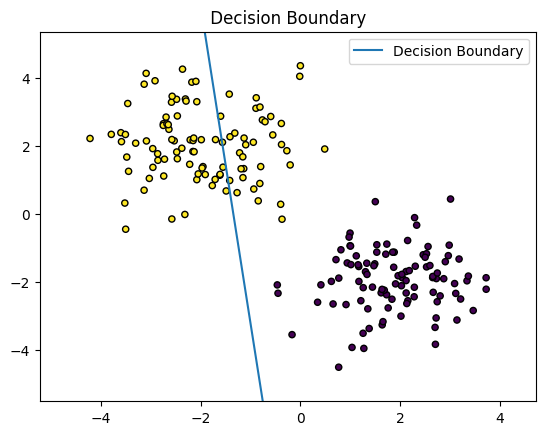

In [8]:
for learning_rate in learning_rates:
    single_layer_nn = SingleLayerNN(input_dimensions=2)
    single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=learning_rate)

Learning rate: 0.1


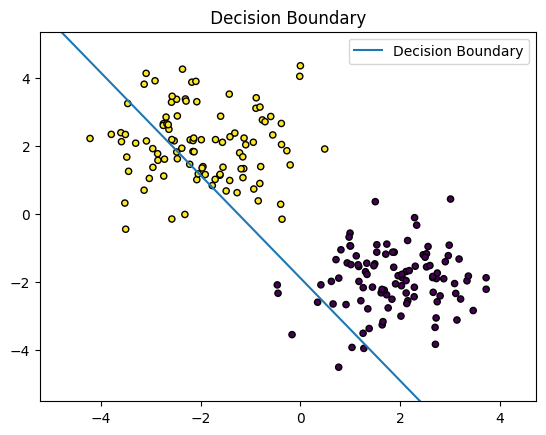

Average loss: 0.0816801377161191
Average loss: 0.05306861154078515
Average loss: 0.04199975825361399
Average loss: 0.03583547530834881
Average loss: 0.031799129976212474
Average loss: 0.02889935399187533
Average loss: 0.02668716715096837
Average loss: 0.024927175591148768
Average loss: 0.023482949415581603
Average loss: 0.022269405349992902


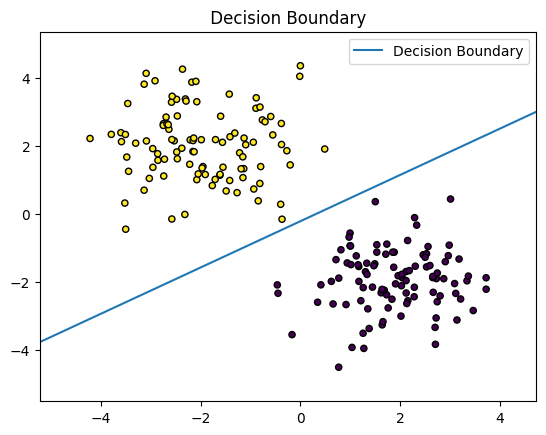

In [11]:
single_layer_nn = SingleLayerNN(input_dimensions=2)
single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=0.1)

# Exercise 2

### Backpropagation

All kinds of crazy stuff about backpropagation

# Exercise 3

### Word Embeddings

All kinds of crazy stuff about word embeddings

# Exercise 4

### Text Prediction

All kinds of crazy stuff about text prediction

# Exercise 5

### Image Classification

All kinds of crazy stuff about image classification